In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
import yfinance as yf


In [2]:
import pandas_datareader as pdr
import os

ModuleNotFoundError: No module named 'pandas_datareader'

In [ ]:
#nifty = pdr.get_dat
---------------------------------------------------------------------------
ModuleNotFoundError    a_tiingo("INDF", api_key = "30f0d443a2a115c661a899929861dccfa07e7478" )
nifty = yf.download('^NSEI',start="2018-10-01", end="2022-09-30",interval='1d')

In [3]:
nifty.to_csv("^NSEI.csv")

NameError: name 'nifty' is not defined

In [4]:
nifty = pd.read_csv("^NSEI.csv")
nifty

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2018-10-01,10930.900391,11035.650391,10821.549805,11008.299805,11008.299805,387000
1,1,2018-10-03,10982.700195,10989.049805,10843.750000,10858.250000,10858.250000,386800
2,2,2018-10-04,10754.700195,10754.700195,10547.250000,10599.250000,10599.250000,425100
3,3,2018-10-05,10514.099609,10540.650391,10261.900391,10316.450195,10316.450195,606400
4,4,2018-10-08,10310.150391,10398.349609,10198.400391,10348.049805,10348.049805,456200
...,...,...,...,...,...,...,...,...
980,980,2022-09-23,17593.849609,17642.150391,17291.650391,17327.349609,17327.349609,390800
981,981,2022-09-26,17156.300781,17196.400391,16978.300781,17016.300781,17016.300781,492000
982,982,2022-09-27,17110.900391,17176.449219,16942.349609,17007.400391,17007.400391,359900
983,983,2022-09-28,16870.550781,17037.599609,16820.400391,16858.599609,16858.599609,323900


In [5]:
nifty.tail()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
980,980,2022-09-23,17593.849609,17642.150391,17291.650391,17327.349609,17327.349609,390800
981,981,2022-09-26,17156.300781,17196.400391,16978.300781,17016.300781,17016.300781,492000
982,982,2022-09-27,17110.900391,17176.449219,16942.349609,17007.400391,17007.400391,359900
983,983,2022-09-28,16870.550781,17037.599609,16820.400391,16858.599609,16858.599609,323900
984,984,2022-09-29,16993.599609,17026.050781,16788.599609,16818.099609,16818.099609,340000


In [6]:
nifty_1 = nifty.reset_index()["Close"]
nifty_1

0      11008.299805
1      10858.250000
2      10599.250000
3      10316.450195
4      10348.049805
           ...     
980    17327.349609
981    17016.300781
982    17007.400391
983    16858.599609
984    16818.099609
Name: Close, Length: 985, dtype: float64

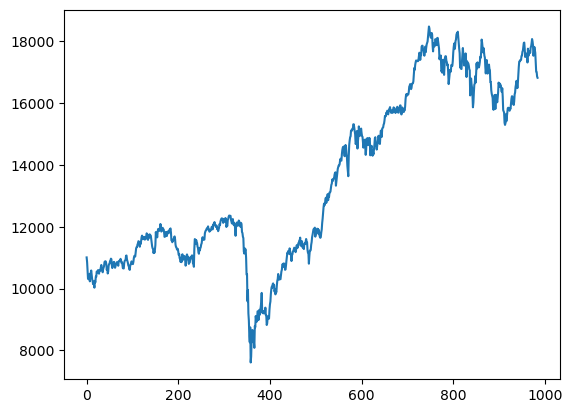

In [7]:
plt.plot(nifty_1)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1) )
nifty_2 = scaler.fit_transform(np.array(nifty_1).reshape(-1,1))

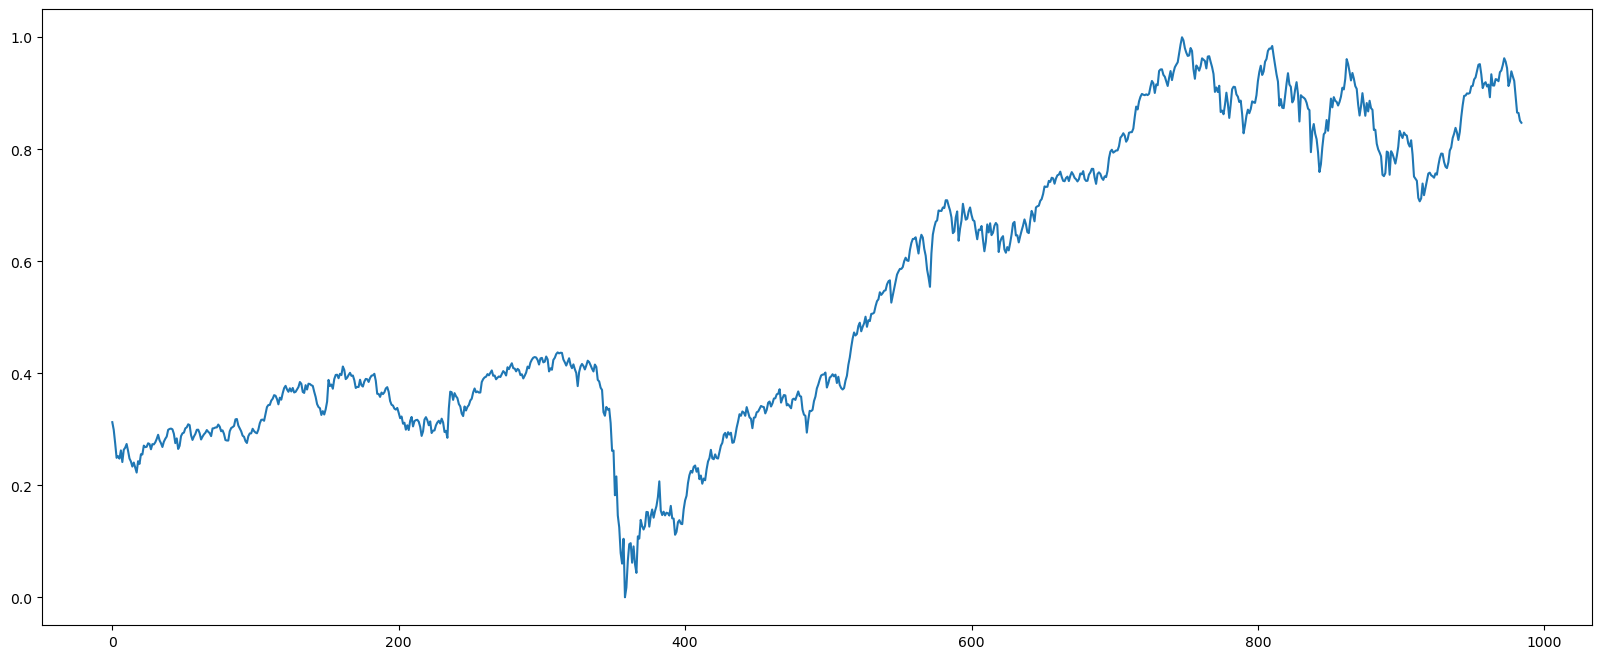

In [9]:
plt.figure(figsize = (20,8))
plt.plot(nifty_2)

In [10]:
train_size = int(len(nifty_2)*0.8)
test_size = len(nifty_2)-train_size
train_size,test_size

(788, 197)

In [11]:
train_data,test_data = nifty_2[0:train_size,:],nifty_2[train_size:,:]

In [12]:
train_data.shape,test_data.shape

((788, 1), (197, 1))

In [13]:
def creat_dataset(data, time_stamp):
    data_x, data_y = [], []
    for i in range(len(data)-time_stamp-1):
        a = data[i: i + time_stamp, 0]
        data_x.append(a)
        b = data[i+time_stamp,0]
        data_y.append(b)
    return data_x, data_y
                

In [14]:
x_train, y_train = creat_dataset(train_data,30)
x_test, y_test = creat_dataset(test_data,30)

In [15]:
x_train = np.asarray(x_train)
x_test = np.asarray(x_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)
x_train,x_test

(array([[0.31270011, 0.29889202, 0.27505795, ..., 0.26428663, 0.27351656,
         0.272946  ],
        [0.29889202, 0.27505795, 0.24903375, ..., 0.27351656, 0.272946  ,
         0.27666378],
        [0.27505795, 0.24903375, 0.25194166, ..., 0.272946  , 0.27666378,
         0.28269131],
        ...,
        [0.97551243, 0.94296382, 0.92588431, ..., 0.88033722, 0.90730475,
         0.91163902],
        [0.94296382, 0.92588431, 0.94962635, ..., 0.90730475, 0.91163902,
         0.9111284 ],
        [0.92588431, 0.94962635, 0.94588089, ..., 0.91163902, 0.9111284 ,
         0.89796438]]),
 array([[0.88693541, 0.86271474, 0.82857406, ..., 0.87779741, 0.88965459,
         0.87421317],
        [0.86271474, 0.82857406, 0.84298956, ..., 0.88965459, 0.87421317,
         0.87345847],
        [0.82857406, 0.84298956, 0.85997704, ..., 0.87421317, 0.87345847,
         0.89535088],
        ...,
        [0.92472018, 0.92832293, 0.94001907, ..., 0.93018174, 0.92203317,
         0.89420058],
        [0.9

In [16]:
import seaborn as sns 
from sklearn.preprocessing import Normalizer
normalizedx_train = Normalizer().fit_transform(x_train)

normalizedx_train = pd.DataFrame(normalizedx_train)
normalizedx_train

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.219491,0.209799,0.193069,0.174802,0.176843,0.173808,0.184081,0.169519,0.184882,0.187466,...,0.179334,0.178936,0.190082,0.188209,0.188596,0.193014,0.192162,0.185509,0.191987,0.191587
1,0.210905,0.194087,0.175724,0.177776,0.174724,0.185052,0.170413,0.185857,0.188454,0.193146,...,0.179880,0.191084,0.189201,0.189591,0.194032,0.193175,0.186487,0.193000,0.192597,0.195221
2,0.194544,0.176138,0.178195,0.175135,0.185488,0.170814,0.186295,0.188898,0.193601,0.185029,...,0.191534,0.189647,0.190037,0.194489,0.193630,0.186926,0.193454,0.193051,0.195680,0.199943
3,0.175763,0.177815,0.174763,0.185093,0.170450,0.185898,0.188496,0.193188,0.184635,0.174925,...,0.189243,0.189633,0.194075,0.193218,0.186528,0.193042,0.192640,0.195264,0.199518,0.204791
4,0.177087,0.174047,0.184334,0.169752,0.185136,0.187724,0.192397,0.183878,0.174208,0.170437,...,0.188856,0.193280,0.192426,0.185764,0.192252,0.191850,0.194464,0.198700,0.203953,0.197019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,0.190518,0.193109,0.192068,0.185659,0.182296,0.186971,0.186234,0.185151,0.186738,0.189488,...,0.177647,0.179843,0.170606,0.171105,0.169823,0.173151,0.177404,0.173691,0.168537,0.173329
753,0.193533,0.192490,0.186068,0.182697,0.187382,0.186643,0.185558,0.187149,0.189904,0.189463,...,0.180239,0.170982,0.171481,0.170196,0.173532,0.177795,0.174073,0.168908,0.173710,0.179031
754,0.192983,0.186544,0.183165,0.187862,0.187121,0.186033,0.187628,0.190390,0.189948,0.189455,...,0.171419,0.171920,0.170632,0.173976,0.178249,0.174518,0.169340,0.174154,0.179489,0.180347
755,0.186989,0.183602,0.188310,0.187567,0.186477,0.188075,0.190844,0.190401,0.189907,0.187287,...,0.172330,0.171039,0.174391,0.178675,0.174935,0.169744,0.174570,0.179917,0.180777,0.180676


<AxesSubplot: >

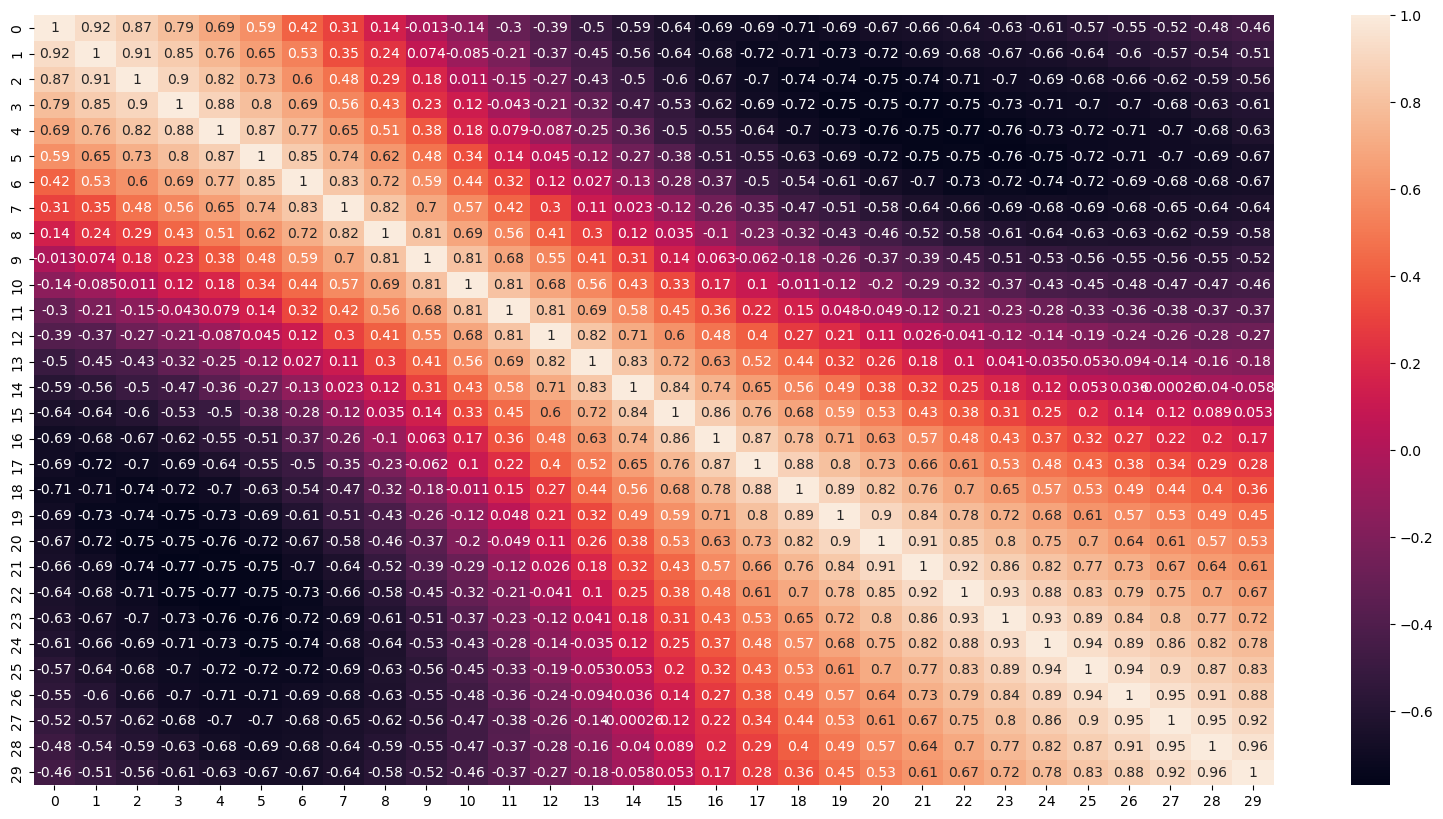

In [17]:
# plot correlation heatmap
plt.figure(figsize = (20,10))
sns.heatmap(normalizedx_train.corr(), annot = True)

In [18]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1],1)

In [19]:
x_train.shape, x_test.shape

((757, 30, 1), (166, 30, 1))

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [21]:
model_1 = Sequential()
model_1.add(LSTM(50, return_sequences = True, input_shape = (30,1)))
model_1.add(LSTM(50, return_sequences= True))
model_1.add(LSTM(50))
model_1.add(Dense(1))
model_1.compile(loss= "mean_squared_error", optimizer = "adam")

In [22]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 50)            20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [23]:
import tensorflow as tf
tf.test.is_built_with_cuda()

True

In [24]:
import time

In [27]:
%timeit -n 1 -r 1 model_1.fit(x_train, y_train, validation_data= (x_test, y_test), epochs= 50, batch_size = 64, verbose = 1)


Epoch 1/50
12/12 [==============================] - 0s 27ms/step - loss: 5.7394e-04 - val_loss: 8.1099e-04
Epoch 2/50
12/12 [==============================] - 0s 11ms/step - loss: 5.5180e-04 - val_loss: 8.3612e-04
Epoch 3/50
12/12 [==============================] - 0s 12ms/step - loss: 5.2423e-04 - val_loss: 0.0011
Epoch 4/50
12/12 [==============================] - 0s 12ms/step - loss: 4.9973e-04 - val_loss: 7.8308e-04
Epoch 5/50
12/12 [==============================] - 0s 12ms/step - loss: 5.3295e-04 - val_loss: 9.9505e-04
Epoch 6/50
12/12 [==============================] - 0s 12ms/step - loss: 5.1859e-04 - val_loss: 0.0010
Epoch 7/50
12/12 [==============================] - 0s 11ms/step - loss: 5.3433e-04 - val_loss: 7.4565e-04
Epoch 8/50
12/12 [==============================] - 0s 12ms/step - loss: 5.8214e-04 - val_loss: 0.0012
Epoch 9/50
12/12 [==============================] - 0s 11ms/step - loss: 5.3139e-04 - val_loss: 7.6075e-04
Epoch 10/50
12/12 [==============================

In [ ]:
train_pred = model_1.predict(x_train)
test_pred = model_1.predict(x_test)
train_pred, test_pred

In [ ]:
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)
train_pred, test_pred

In [ ]:
import math
from sklearn.metrics import mean_squared_error

In [ ]:
math.sqrt(mean_squared_error(y_train, train_pred))

In [ ]:
math.sqrt(mean_squared_error(y_test, test_pred))

In [ ]:
import numpy
### Plotting 
# shift train predictions for plotting
look_back = 30
trainPredictPlot = numpy.empty_like(nifty_2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_pred)+look_back, :] = train_pred

In [ ]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(nifty_2)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_pred)+(look_back*2)+1:len(nifty_2)-1, :] = test_pred

In [ ]:
# plot baseline and predictions
plt.figure(figsize = (18,10))
plt.plot(scaler.inverse_transform(nifty_2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(train_data),len(test_data)

In [ ]:
x_input = test_data[167:].reshape(1,-1)
x_input.shape

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=30
i=0
while(i<5):
    
    if(len(temp_input)>30):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model_1.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model_1.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

In [ ]:
day_new=np.arange(1,31)
day_pred=np.arange(31,36)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(nifty_2)

In [ ]:
plt.plot(day_new,scaler.inverse_transform(nifty_2[955:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
nifty_3=nifty_2.tolist()
nifty_3.extend(lst_output)
plt.plot(nifty_3[955:])

In [ ]:
check_nifty = yf.download('^NSEI',start="2022-09-01", end="2022-10-05",interval='1d')

In [ ]:
check_nifty_1 = check_nifty.reset_index()["Close"]
check_nifty_1

In [ ]:
plt.plot(check_nifty_1)

# Prediction for next 10 days

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output_10=[]
n_steps=30
i=0
while(i<10):
    
    if(len(temp_input)>30):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model_1.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_10.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model_1.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_10.extend(yhat.tolist())
        i=i+1
    

print(lst_output_10)

In [ ]:
day_new_10=np.arange(1,31)
day_pred_10=np.arange(31,41)

In [ ]:
plt.plot(day_new_10,scaler.inverse_transform(nifty_2[955:]))
plt.plot(day_pred_10,scaler.inverse_transform(lst_output_10))

In [ ]:
plt.plot(check_nifty_1)

# German Market

In [ ]:
sdax = yf.download('^SDAXI',start="2018-10-01", end="2022-09-30",interval='1d')

In [ ]:
sdax = sdax.reset_index()["Close"]

In [ ]:
sdax

In [ ]:
plt.figure(figsize = (18, 8))
plt.plot(sdax[900:])

In [ ]:
sdax_1 = scaler.fit_transform(np.array(sdax).reshape(-1,1))

In [ ]:
sdax_1

In [ ]:
train_len = int(len(sdax_1)*0.8)
test_len = 1- train_len
train_data, test_data = sdax_1[:train_len], sdax_1[train_len:]
train_data.shape, test_data.shape

In [ ]:
def creat_dataset(data, time_stamp):
    data_x, data_y = [], []
    for i in range(len(data)-time_stamp-1):
        a = data[i: i + time_stamp, 0]
        data_x.append(a)
        b = data[i+time_stamp,0]
        data_y.append(b)
    return data_x, data_y

In [ ]:
x_train_1, y_train_1 = creat_dataset(train_data,30)

In [ ]:
x_test_1, y_test_1 = creat_dataset(test_data,30)

In [ ]:
x_train_1, y_train_1, x_test_1, y_test_1

In [ ]:
x_train_1, y_train_1 = np.asarray(x_train_1), np.asarray(y_train_1)
x_test_1, y_test_1 = np.asarray(x_test_1), np.asarray(y_test_1)
x_train_1, x_test_1

In [ ]:
x_train_1.shape, x_test_1.shape

In [ ]:
x_train_1 = x_train_1.reshape(x_train_1.shape[0],x_train_1.shape[1],1)
x_test_1 = x_test_1.reshape(x_test_1.shape[0],x_test_1.shape[1],1)
x_train_1.shape, x_test_1.shape

In [ ]:
model_1.fit(x_train_1, y_train_1, validation_data= (x_test_1, y_test_1), epochs= 50, batch_size = 64, verbose = 1)

In [ ]:
x_test_1.shape

In [ ]:
x_input_sdax = x_test_1[142:,0].reshape(1,-1)
x_input_sdax.shape

In [ ]:
temp_input_sdax = list(x_input_sdax)

In [ ]:
# demonstrate prediction for next 2 days
from numpy import array

lst_output_sdax=[]
n_steps=30
i=0
while(i<2):
    
    if(len(temp_input_sdax)>30):
        #print(temp_input)
        x_input_sdax=np.array(temp_input_sdax[1:])
        print("{} day input {}".format(i,x_input_sdax))
        x_input_sdax=x_input_sdax.reshape(1,-1)
        x_input_sdax = x_input_sdax.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model_1.predict(x_input_sdax, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input_sdax.extend(yhat[0].tolist())
        temp_input_sdax=temp_input_sdax[1:]
        #print(temp_input)
        lst_output_sdax.extend(yhat.tolist())
        i=i+1
    else:
        x_input_sdax = x_input_sdax.reshape((1, n_steps,1))
        yhat = model_1.predict(x_input_sdax, verbose=0)
        print(yhat[0])
        temp_input_sdax.extend(yhat[0].tolist())
        print(len(temp_input_sdax))
        lst_output_sdax.extend(yhat.tolist())
        i=i+1
    

print(lst_output_sdax)

In [ ]:
day_new_sdax = np.arange(1,31)
day_pred_sdax = np.arange(31,33)

In [ ]:
len(sdax_1)

In [ ]:
plt.plot(day_new_sdax,scaler.inverse_transform(sdax_1[983:]))
plt.plot(day_pred_sdax,scaler.inverse_transform(lst_output_sdax))

In [ ]:
sdax_check = yf.download('^SDAXI',start="2022-09-01", end="2022-10-07",interval='1d')

In [ ]:
sdax_check = sdax_check.reset_index()["Close"]

In [ ]:
plt.plot(sdax_check)

In [ ]:
x_train_1.shape

In [ ]:
x_train_check = x_train_1.reshape(x_train_1.shape[0],x_train_1.shape[1])
x_train_check.shape

In [ ]:
normalizedx_train_sdax = Normalizer().fit_transform(x_train_check)

normalizedx_train_sdax = pd.DataFrame(normalizedx_train_sdax)
normalizedx_train_sdax

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(normalizedx_train_sdax.corr(), annot = True)

In [ ]:
sp500 = yf.download('^NSEI',start="2018-10-01", end="2022-09-30",interval='1d')

In [ ]:
sp500.head()

In [ ]:
# Clean the data and convert to daily returns
sp500["returns"] = np.log(sp500["Close"]/sp500["Close"].shift(1))
sp500 = sp500.dropna()

In [ ]:
# Calculate the moving average of the stock prices
window_size = 50
sp500["ma"] = sp500["Close"].rolling(window=window_size).mean()

# Plot the moving average and the stock prices
plt.figure(figsize=(12, 8))
plt.plot(sp500["Close"], label="Stock Prices")
plt.plot(sp500["ma"], label="Moving Average")
plt.xlabel("Year")
plt.ylabel("Price")
plt.title("S&P 500 Moving Average")
plt.legend()
plt.show()

In [ ]:
# Calculate EWMA
sp500["EWMA"] = sp500["Close"].ewm(span=30, adjust=False).mean()

# Plot the original closing prices and the EWMA
plt.figure(figsize=(15, 8))
plt.plot(sp500["Close"], label="Closing Prices")
plt.plot(sp500["EWMA"], label="EWMA")
plt.plot(sp500["ma"], label="Moving Average")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Price")
plt.title("S&P 500 Closing Prices and EWMA")
plt.show()

In [ ]:
result = adfuller(sp500["Close"])
print("Augmented Dickey-Fuller Test Results")
print("Test Statistic: {:.3f}".format(result[0]))
print("p-value: {:.3f}".format(result[1]))
print("Critical Values:")
for key, value in result[4].items():
    print("\t{}: {:.3f}".format(key, value))
    
if result[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

# Deep Learning

In [ ]:
df = sp500.reset_index()["Close"]
df

In [ ]:
plt.plot(df)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df = scaler.fit_transform(np.array(df).reshape(-1,1))

In [ ]:
train_size = int(len(df)*0.65)
test_size = len(df) - train_size
train_data,test_data=df[0:train_size,:],df[train_size:len(df),:1]

In [ ]:
train_size,test_size

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [ ]:
import numpy
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

In [ ]:
print(X_test.shape), print(ytest.shape)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = "mean_squared_error", optimizer = "adam")

In [ ]:
model.summary()

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

In [ ]:
### Plotting 
# shift train predictions for plotting
plt.figure(figsize=(12, 8))
look_back=100
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

In [ ]:
x_input=test_data[253:].reshape(1,-1)
x_input.shape

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df)

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df[906:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
sp_pred = yf.download('^GSPC',start="2018-10-01", end="2022-10-30",interval='1d')
sp_pred

In [ ]:
df1 = sp_pred.reset_index()["Close"]

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(df1)

# Arima Model

In [ ]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
result = adf_test(sp500['Close'].dropna())

In [ ]:
### First Shift 
## Use Techniques Differencing
sp500['Close_1']=sp500["Close"]-sp500["Close"].shift(1)

In [ ]:
result = adf_test(sp500['Close_1'].dropna())

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(211)
acf = sm.graphics.tsa.plot_acf(sp500['Close_1'].dropna(),lags=50, ax=ax1)
ax2 = fig.add_subplot(212)
pacf = sm.graphics.tsa.plot_pacf(sp500['Close_1'].dropna(),lags=50, ax=ax2)

In [ ]:
# For non-seasonal data
#p=0, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [ ]:
model = sm.tsa.arima.ARIMA(sp500["Close"],order=(45,1,45))
model_fit=model.fit()

In [ ]:
model_fit.summary()

In [ ]:
sp500['forecast']=model_fit.predict(start="2022-05-01",end="2022-05-28",dynamic=True)
sp500[['Close','forecast']].plot(figsize=(12,8))

In [ ]:
### 12 months 
## Use Techniques Differencing
sp500['Close 12 Difference']=sp500["Close"]-sp500["Close"].shift(24)

# Sarimax

In [ ]:
model=sm.tsa.statespace.SARIMAX(sp500["Close"],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

In [ ]:
sp500['forecast']=results.predict(start="2020-10-01",end="2020-11-30",dynamic=True)
sp500[['Close','forecast']].plot(figsize=(12,8))
plt.xlim(pd.Timestamp('2020-06-01'), pd.Timestamp('2021-03-01'))

In [ ]:
result = adf_test(sp500['Close 12 Difference'].dropna())


In [ ]:
### 2_12 months 
## Use Techniques Differencing
sp500['Close 2_12 Difference']=sp500["Close 12 Difference"]-sp500["Close 12 Difference"].shift(1)

In [ ]:
result_1 = adf_test(sp500['Close 2_12 Difference'].dropna())

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
acf12 = plot_acf(sp500['Close 12 Difference'].dropna())

In [ ]:
pacf12 = plot_pacf(sp500['Close 2_12 Difference'].dropna())

In [ ]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,365))

In [ ]:
# Test for random walk hypothesis using Augmented Dickey-Fuller test
result = adfuller(sp500["returns"])
print("ADF Test:")
print("Test Statistic: ", result[0])
print("p-value: ", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print("\t", key, ": ", value)

In [ ]:
# Plot autocorrelation and partial autocorrelation
plt.figure(figsize=(12, 8))

plt.subplot(2,1,1)
acf_result = acf(sp500["returns"], nlags=30)
plt.plot(acf_result)
plt.axhline(y=0, linestyle="--", color="gray")
plt.axhline(y=-1.96/np.sqrt(len(sp500["returns"])), linestyle="--", color="gray")
plt.axhline(y=1.96/np.sqrt(len(sp500["returns"])), linestyle="--", color="gray")
plt.title("Autocorrelation")

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(2,1,2)
pacf_result = pacf(sp500["returns"], nlags=30, method="ols")
plt.plot(pacf_result)
plt.axhline(y=0, linestyle="--", color="gray")
plt.axhline(y=-1.96/np.sqrt(len(sp500["returns"])), linestyle="--", color="gray")
plt.axhline(y=1.96/np.sqrt(len(sp500["returns"])), linestyle="--", color="gray")
plt.title("Partial Autocorrelation")


In [ ]:
plt.tight_layout()
plt.show()